<a href="https://colab.research.google.com/github/Yoshibansal/ML-practical/blob/main/Cat_vs_Dog_Part-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cat vs Dog (Binary class classification)
ImageDataGenerator

(Understanding overfitting)

Download dataset

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-12-05 14:54:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.208, 142.250.73.208, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   235MB/s    in 0.3s    

2020-12-05 14:54:05 (235 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
#importing libraries
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#unzip
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
INPUT_SHAPE = (150, 150)
MODEL_INPUT_SHAPE = INPUT_SHAPE + (3,)

#HYPERPARAMETERS
LEARNING_RATE = 1e-4
BATCH_SIZE = 20
EPOCHS = 50

In [6]:
#model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = MODEL_INPUT_SHAPE),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=LEARNING_RATE),
              metrics=['accuracy'])

In [7]:
#summary of model (including type of layer, Ouput shape and number of parameters)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

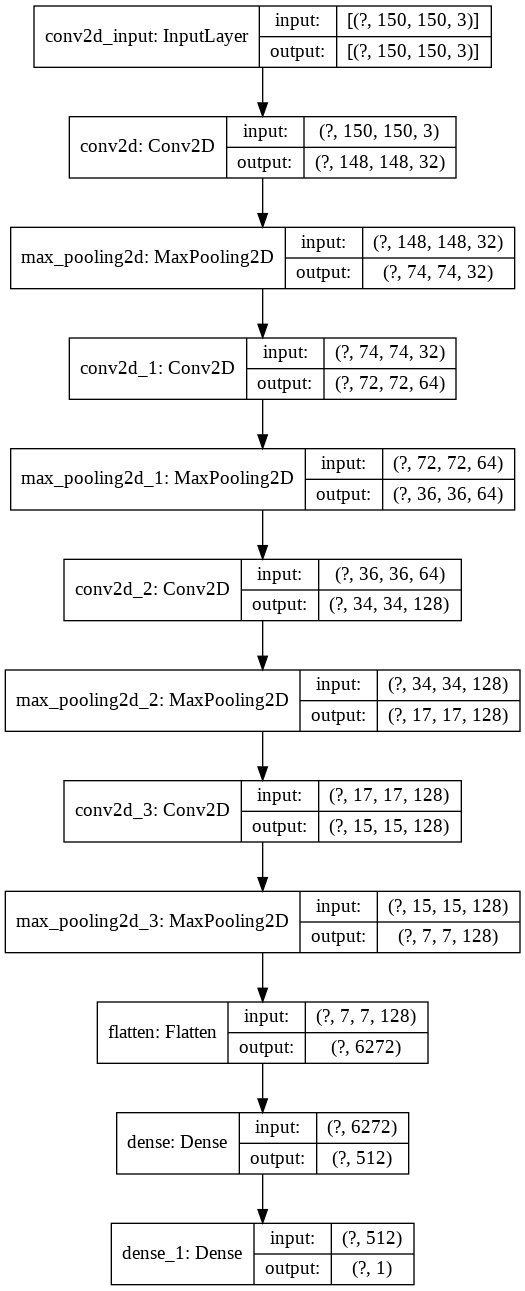

In [8]:
#plotting model and saving it architecture picture
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [9]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=INPUT_SHAPE,  # All images will be resized to 150x150
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=INPUT_SHAPE,
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
#Fitting data into model -> training model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # steps = 2000 images / batch_size
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # steps = 1000 images / batch_size
      verbose=1)

Epoch 1/50
100/100 [==============================] - 9s 91ms/step - loss: 0.6879 - accuracy: 0.5430 - val_loss: 0.6701 - val_accuracy: 0.5190
Epoch 2/50
100/100 [==============================] - 9s 92ms/step - loss: 0.6447 - accuracy: 0.6365 - val_loss: 0.6158 - val_accuracy: 0.6660
Epoch 3/50
100/100 [==============================] - 9s 91ms/step - loss: 0.5964 - accuracy: 0.6850 - val_loss: 0.5820 - val_accuracy: 0.7000
Epoch 4/50
100/100 [==============================] - 9s 91ms/step - loss: 0.5585 - accuracy: 0.7110 - val_loss: 0.5762 - val_accuracy: 0.6860
Epoch 5/50
100/100 [==============================] - 9s 92ms/step - loss: 0.5240 - accuracy: 0.7350 - val_loss: 0.5707 - val_accuracy: 0.7080
Epoch 6/50
100/100 [==============================] - 9s 91ms/step - loss: 0.5023 - accuracy: 0.7520 - val_loss: 0.5986 - val_accuracy: 0.6730
Epoch 7/50
100/100 [==============================] - 9s 91ms/step - loss: 0.4773 - accuracy: 0.7700 - val_loss: 0.5447 - val_accuracy: 0.7260

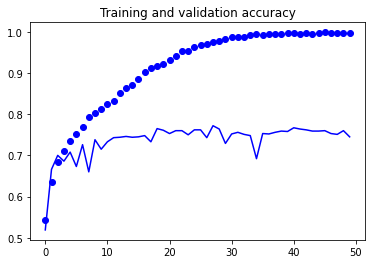

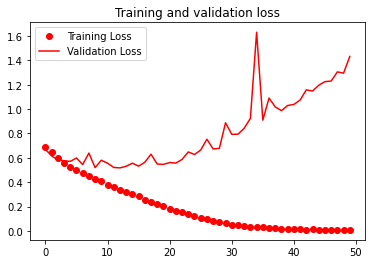

In [14]:
#PLOTTING model performance

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't.

next we see how we can do better to avoid overfitting -- and one simple method is to **augment** the images a bit.